In [22]:
# perform imports, set up paths

import os
import sys
from pathlib import Path

import pandas as pd
import openpyxl
from matplotlib import pyplot as plt

# the top level location of the project code
CURRENT_DIR_STR = os.path.abspath('')
CURRENT_DIR_PATH = Path(CURRENT_DIR_STR)
sys.path.append(CURRENT_DIR_PATH)
DATA_DIR_STR = os.path.join(CURRENT_DIR_STR, 'data')
DATA_DIR_PATH = Path(DATA_DIR_STR)
sys.path.append(DATA_DIR_PATH)

In [23]:
# read the producer exporter .json file into a dataframe

country_file_path = Path(os.path.join(DATA_DIR_STR, 'prod_exp.json'))
prod_exp_df = pd.DataFrame.transpose(pd.read_json(country_file_path))

prod_exp_df

,region,country,time_zones
BRA,Americas,Brazil,"[-5, -4, -3, -2]"
VNM,Asia & Oceania,Viet Nam,[7]
COL,Americas,Colombia,[-5]
IDN,Asia & Oceania,Indonesia,"[7, 8, 9]"
HND,Americas,Honduras,[-6]
UGA,Africa,Uganda,[3]
IND,Asia & Oceania,India,[5.5]
ETH,Africa,Ethiopia,[3]
PER,Americas,Peru,[-5]
GTM,Americas,Guatemala,[-6]


In [24]:
# load the coffee production data into a dataframe and reorganize the data

# Total production by all exporting countries in thousand 60kg bags
c_1a = "Total production by all exporting countries in thousand 60kg bags"
xl_1a = "1a - Total production.xlsx"

prod_path = Path(os.path.join(DATA_DIR_STR, xl_1a))
df1a=pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df1a.drop([0, 15, 23, 58], inplace=True)

# change the Country column names and reset the year names

df1a.rename(columns={"Crop year": "Country", "1990/91": "1990", "1991/92": "1991", "1992/93": "1992", "1993/94": "1993", "1994/95": "1994", "1995/96": "1995", "1996/97": "1996", "1997/98": "1997", "1998/99": "1998", "1999/00": "1999", "2000/01": "2000", "2001/02": "2001", "2002/03": "2002", "2003/04": "2003",
            "2004/05": "2004", "2005/06": "2005", "2006/07": "2006", "2007/08": "2007", "2008/09": "2008", "2009/10": "2009", "2010/11": "2010", "2011/12": "2011", "2012/13": "2012", "2013/14": "2013", "2014/15": "2014", "2015/16": "2015", "2016/17": "2016", "2017/18": "2017", "2018/19": "2018", "2019/20": "2019"}, inplace=True)

# sort the dataframes by Country
df1a.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df1a

iso_code = []

for i, drow in df1a.iterrows():
    for j, prow in prod_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df1a["iso_code"] = iso_code
df1a.set_index(["iso_code"], inplace=True)

#df1a

c:\Python\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [25]:
# load the coffee consumption data into a dataframe and reorganize the data

# Total production by all exporting countries in thousand 60kg bags
c_1b = "Domestic consumption by all exporting countries in thousand 60kg bags"
xl_1b = "1b - Domestic consumption.xlsx"

prod_path = Path(os.path.join(DATA_DIR_STR, xl_1b))
df1b = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df1b.drop([0, 15, 23, 58], inplace=True)

# change the Country column names and reset the year names

df1b.rename(columns={"Crop year": "Country", "1990/91": "1990", "1991/92": "1991", "1992/93": "1992", "1993/94": "1993", "1994/95": "1994", "1995/96": "1995", "1996/97": "1996", "1997/98": "1997", "1998/99": "1998", "1999/00": "1999", "2000/01": "2000", "2001/02": "2001", "2002/03": "2002", "2003/04": "2003",
            "2004/05": "2004", "2005/06": "2005", "2006/07": "2006", "2007/08": "2007", "2008/09": "2008", "2009/10": "2009", "2010/11": "2010", "2011/12": "2011", "2012/13": "2012", "2013/14": "2013", "2014/15": "2014", "2015/16": "2015", "2016/17": "2016", "2017/18": "2017", "2018/19": "2018", "2019/20": "2019"}, inplace=True)

# sort the dataframes by Country
df1b.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df1b

iso_code = []

for i, drow in df1b.iterrows():
    for j, prow in prod_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df1b["iso_code"] = iso_code
df1b.set_index(["iso_code"], inplace=True)

# df1b

c:\Python\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [26]:
# load the coffee export data into a dataframe and reorganize the data

# Exports of all forms of coffee by all exporting countries in thousand 60kg bags
c_2a = "Exports of all forms of coffee by all exporting countries in thousand 60kg bags"
xl_2a = "2a - Exports - calendar year.xlsx"

prod_path = Path(os.path.join(DATA_DIR_STR, xl_2a))
df2a = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df2a.drop([55], inplace=True)

# change the Country column name
df2a.rename(columns={"Calendar years": "Country"}, inplace=True)

# sort the dataframes by Country
df2a.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df2a

iso_code = []

for i, drow in df2a.iterrows():
    for j, prow in prod_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df2a["iso_code"] = iso_code
df2a.set_index(["iso_code"], inplace=True)

# df2a

In [27]:
# read the importer exporter .json file into a dataframe

non_prod_file_path = Path(os.path.join(DATA_DIR_STR, 'imp_exp.json'))
imp_exp_df = pd.DataFrame.transpose(pd.read_json(non_prod_file_path))

imp_exp_df

,region,country,time_zones
AUT,Europe,Austria,[1]
BEL,,Belgium,[1]
BGR,,Bulgaria,[2]
HRV,,Croatia,[1]
CYP,,Cyprus,[2]
CZE,,Czechia,[1]
DNK,,Denmark,[1]
EST,,Estonia,[2]
FIN,,Finland,[2]
FRA,,France,[1]


In [28]:
# load the coffee import data into a dataframe and reorganize the data

# Imports by selected importing countries in thousand 60-kg bags
c_2b = "Imports by selected importing countries in thousand 60-kg bags"
xl_2b = "2b - Imports.xlsx"
prod_path = Path(os.path.join(DATA_DIR_STR, xl_2b))
df2b = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df2b.drop([0, 3, 36], inplace=True)

# change the Country column names
df2b.rename(columns={"Calendar years": "Country"}, inplace=True)

# sort the dataframes by Country and strip white space from country names
df2b["Country"] = df2b["Country"].apply(lambda x: x.strip())
df2b.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df2b

iso_code = []

for i, drow in df2b.iterrows():
    for j, prow in imp_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df2b["iso_code"] = iso_code
df2b.set_index(["iso_code"], inplace=True)

df2b


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso_code,,,,,,,,,,,,,,,,,,,,,
AUT,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1369.200299,1452.492905,1558.609366,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664
BEL,Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5923.729993,5828.442382,5668.231844,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527
BGR,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,528.372082,481.510209,559.825066,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715
HRV,Croatia,0.000000,0.000000,168.190005,162.774001,193.450002,320.132006,321.835998,385.297004,339.051001,...,393.825469,390.873959,384.490360,412.849422,419.673550,437.201445,478.666658,439.074412,445.513611,466.417527
CYP,Cyprus,49.853999,53.926000,40.875999,77.412000,51.836001,43.769000,51.501999,41.340999,49.778999,...,76.728448,82.078754,83.877469,93.766183,94.388100,89.304875,93.153307,99.933874,133.179542,133.224874
CZE,Czechia,659.433000,525.274000,474.731003,514.277005,553.797003,553.196999,525.298002,560.225003,764.839002,...,950.721928,952.366595,1126.622901,1183.882242,1822.690779,2067.838569,1779.351245,1506.967219,1903.158902,1608.921470
DNK,Denmark,959.105004,982.757004,1061.623004,993.947000,1033.184003,877.159002,1005.999200,949.070500,1013.723201,...,1014.640895,908.869741,913.098994,921.178915,853.423879,840.777636,905.789619,852.193333,867.950523,907.935154
EST,Estonia,0.000000,0.000000,16.378000,51.147998,83.097998,107.478002,116.918007,141.114997,134.658996,...,262.870187,166.855732,157.234790,156.214012,130.853713,126.200638,134.802638,133.148138,147.137781,147.848908
FIN,Finland,1095.140998,1033.066999,1055.361000,1301.455999,1361.003002,769.499000,992.273602,1185.521302,1167.935302,...,1273.743443,1286.515065,1237.833040,1275.467965,1213.055380,1320.802279,1388.966280,1360.023736,1284.822821,1515.473931


In [29]:
# load the coffee reexport data into a dataframe and reorganize the data

# # Re-exports by selected importing  countries in thousand 60-kg bags
c_2c = "Re-exports by selected importing  countries in thousand 60-kg bags"
xl_2c = "2c - Re-exports.xlsx"
prod_path = Path(os.path.join(DATA_DIR_STR, xl_2c))
df2c = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df2c.drop([0, 3, 36], inplace=True)

# change the Country column names
df2c.rename(columns={"Calendar years": "Country"}, inplace=True)

# sort the dataframes by Country and strip white space from country names
df2c.sort_values(by=["Country"], inplace=True)
df2c["Country"] = df2c["Country"].apply(lambda x: x.strip())

# reset the index to iso code for df2c

iso_code = []

for i, drow in df2c.iterrows():
    for j, prow in imp_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df2c["iso_code"] = iso_code
df2c.set_index(["iso_code"], inplace=True)

df2c


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso_code,,,,,,,,,,,,,,,,,,,,,
AUT,Austria,414.593018,756.185035,960.082041,535.488020,380.995008,228.666006,162.678005,222.123808,209.615909,...,463.345970,365.147262,303.589908,310.870847,386.371358,377.551736,307.691478,308.293141,257.413549,274.161979
BEL,Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5053.064814,4893.973633,4753.595285,4256.978879,3952.812466,4459.903535,4550.045360,4377.324264,4377.326748,5013.520188
BGR,Bulgaria,166.400000,183.459000,7.353000,70.488000,109.904001,122.010001,25.685000,19.236000,17.962000,...,133.014090,121.990458,183.883815,190.879821,244.472722,275.499488,326.814054,291.870737,311.524516,361.830065
HRV,Croatia,0.000000,0.000000,33.645001,30.884001,29.588001,31.651001,17.367000,23.901001,19.321001,...,23.986876,23.720815,24.126241,26.286796,51.213558,62.553903,99.081481,77.968438,85.576221,85.911755
CYP,Cyprus,16.283000,7.229000,3.572000,1.896000,1.467000,1.091000,0.761000,0.845000,0.573000,...,2.137800,0.071229,0.973149,1.684554,8.408183,2.577417,3.672933,1.696513,1.214950,23.260300
CZE,Czechia,0.000000,0.000000,2.574998,65.882001,45.073003,41.743002,50.306000,75.645004,241.431005,...,480.990250,379.908125,441.396615,546.456926,824.506985,1359.471411,973.344665,702.794108,745.564434,766.220101
DNK,Denmark,93.966004,74.215003,102.788005,103.391003,124.701001,119.362004,110.985203,140.613306,160.063108,...,208.152144,146.611112,113.274668,98.999117,105.395584,109.377010,152.456804,119.673974,128.456195,129.792538
EST,Estonia,0.000000,0.000000,3.469000,6.958999,19.934003,24.629998,32.703996,42.252998,45.128000,...,158.087483,100.241323,53.254277,36.157901,13.521563,7.144566,13.480267,24.525648,20.695008,25.339064
FIN,Finland,18.706000,20.513000,35.033001,197.592007,217.495008,96.821004,171.631707,205.096006,185.570205,...,193.319228,193.537990,155.807056,180.830527,183.319354,210.742948,241.554917,297.990216,178.590951,167.551473


In [30]:
# merge the production and export values into new columns in prod_exp_df

prod_exp_df['2019 Prod'] = df1a['2019']
prod_exp_df['2019 Cons'] = df1b['2019']
prod_exp_df['2019 Exp'] = df2a['2019']

prod_exp_df


,region,country,time_zones,2019 Prod,2019 Cons,2019 Exp
BRA,Americas,Brazil,"[-5, -4, -3, -2]",58210.7127,22000.000,40697.863709
VNM,Asia & Oceania,Viet Nam,[7],30487.1644,2650.000,27400.161817
COL,Americas,Colombia,[-5],14100.1182,2024.774,13672.225599
IDN,Asia & Oceania,Indonesia,"[7, 8, 9]",11432.9425,4806.000,6333.872889
HND,Americas,Honduras,[-6],5931.2200,350.000,6764.564607
UGA,Africa,Uganda,[3],5509.1540,254.000,4526.143000
IND,Asia & Oceania,India,[5.5],4987.6264,1450.000,6027.861152
ETH,Africa,Ethiopia,[3],7343.4329,3781.000,3921.249773
PER,Americas,Peru,[-5],3836.3817,250.000,3771.945882
GTM,Americas,Guatemala,[-6],3605.7644,393.000,3613.187991


Of the 6 coffee producing countries that have more than one time zone (Brazil, Mexico, Indonesia, Papua New Guinea, Ecuador, Democratic Republic of Congo), only 2 (Indonesia and Brazil) produce coffee in more than one time zone.

Indonesia produces coffee in all 3 time zones (UTC 7, 8, 9) and is the # 4 global producer, accounting for 5% of the global market.  A regional breakdown of production is difficult to find, but the 2 largest islands (Sumatra and Java) are also the commercial hub of Indonesia, so we will assign all the production and export to UTC+7.

Brazil is the #1 global producer, with around 32% of the global market, but 96% of the national production is in UTC-3.  The remaining 4% (2.3m bags) comes from Rondônia State on the border with Bolivia in UTC-4.  Therefore, for simplicity, 2.3m bags will be added to Bolivia's output, leaving 56m bags to be produced in UTC-3.

The remaining 4 producers only produce coffee in:
Mexico: UTC-6
Papua New Guinea: UTC+10
Ecuador: UTC-5
DR Congo: UTC+2

In [31]:
# convert the single time zone countries to the numeric value time zone
for row, val in prod_exp_df.iterrows():
    if len(val["time_zones"]) == 1:
        prod_exp_df.at[row, "time_zones"] = val["time_zones"][0]

# set the multi-time zone countries to the chosen numeric value
prod_exp_df.at['BRA', 'time_zones'] = -3
prod_exp_df.at['IDN', 'time_zones'] = 7
prod_exp_df.at['MEX', 'time_zones'] = -6
prod_exp_df.at['PNG', 'time_zones'] = 10
prod_exp_df.at['ECU', 'time_zones'] = -5
prod_exp_df.at['COD', 'time_zones'] = 2

prod_exp_df

,region,country,time_zones,2019 Prod,2019 Cons,2019 Exp
BRA,Americas,Brazil,-3,58210.7127,22000.000,40697.863709
VNM,Asia & Oceania,Viet Nam,7,30487.1644,2650.000,27400.161817
COL,Americas,Colombia,-5,14100.1182,2024.774,13672.225599
IDN,Asia & Oceania,Indonesia,7,11432.9425,4806.000,6333.872889
HND,Americas,Honduras,-6,5931.2200,350.000,6764.564607
UGA,Africa,Uganda,3,5509.1540,254.000,4526.143000
IND,Asia & Oceania,India,5.5,4987.6264,1450.000,6027.861152
ETH,Africa,Ethiopia,3,7343.4329,3781.000,3921.249773
PER,Americas,Peru,-5,3836.3817,250.000,3771.945882
GTM,Americas,Guatemala,-6,3605.7644,393.000,3613.187991


In [32]:
# per above (see markup cell), reduce BRA by 2.3m bags and add that amount to BOL
# calculate the appropriate proportion for exports
bra_exp_prop = prod_exp_df.at['BRA', '2019 Exp'] / prod_exp_df.at['BRA', '2019 Prod']
tz_prod_adj = 2300
tz_exp_adj = tz_prod_adj * bra_exp_prop

# massage the data to move 2.3m bags from UTC-3 (BRA) to UTC-4 (BOL)
# correctly accounts for Rondônia State production and an approximation for export
prod_exp_df.at['BRA', '2019 Prod'] -= tz_prod_adj 
prod_exp_df.at['BOL', '2019 Prod'] += tz_prod_adj
prod_exp_df.at['BRA', '2019 Exp'] -= tz_exp_adj
prod_exp_df.at['BOL', '2019 Exp'] += tz_exp_adj

prod_exp_df


,region,country,time_zones,2019 Prod,2019 Cons,2019 Exp
BRA,Americas,Brazil,-3,55910.7127,22000.000,39089.824875
VNM,Asia & Oceania,Viet Nam,7,30487.1644,2650.000,27400.161817
COL,Americas,Colombia,-5,14100.1182,2024.774,13672.225599
IDN,Asia & Oceania,Indonesia,7,11432.9425,4806.000,6333.872889
HND,Americas,Honduras,-6,5931.2200,350.000,6764.564607
UGA,Africa,Uganda,3,5509.1540,254.000,4526.143000
IND,Asia & Oceania,India,5.5,4987.6264,1450.000,6027.861152
ETH,Africa,Ethiopia,3,7343.4329,3781.000,3921.249773
PER,Americas,Peru,-5,3836.3817,250.000,3771.945882
GTM,Americas,Guatemala,-6,3605.7644,393.000,3613.187991


Of the 3 coffee processing countries (import and export) that have more than one time zone (USA, Russian Federation, Spain) we don't have data per time zone.  However, we do have approximate population data.

The USA most likely imports and exports all coffee fron the East and West coasts: UTC-5 and UTC -8. Therefore, the import and export figures will be dvided evenly between the East and West coasts.  Consumption (import minus export) can be assumed to be evenly distributed by time zone population.

The Russian Federation likely does most of its import in the West of the country (UTC 3).   Consumption (import minus export) can be assumed to be evenly distributed by time zone population.

It can be assumed that Spain conducts all of it's coffee business and consumption on the mainland (UTC 1), with no significant activity happening in the Canary Islands (UTC 0)

In [33]:
# convert the single time zone countries to the numeric value time zone
for row, val in imp_exp_df.iterrows():
    if len(val["time_zones"]) == 1:
        imp_exp_df.at[row, "time_zones"] = val["time_zones"][0]

# set Spain to the chosen numeric value
imp_exp_df.at['ESP', 'time_zones'] = 1


USA population by Time Zone

	            2017	        2018		
USA Eastern	    153,079,000 	153,784,000 -5	46.97%
USA Central	    107,155,300 	107,648,800 -6	32.88%
USA Mountain	17,587,800 	    17,668,800 	-7	5.40%
USA Pacific	    45,923,700 	    46,135,200 	-8	14.09%
USA Alaska	    732,825 	    736,200 	-9	0.22%
USA Hawaii	    1,416,795 	    1,423,320 	-10	0.43%
	            325,895,420 	327,396,320 		

In [34]:
# create data for synthetic US time zone countries

us_tz_pop_factors = {
    "US-5": 0.4697,
    "US-6": 0.3288,
    "US-7": 0.054,
    "US-8": 0.1409,
    "US-9": 0.0022,
    "US-10": 0.0043
}

us_synth_countries = {
    'iso_code': ["US-5", "US-6", "US-7", "US-8", "US-9", "US-10"],
    'region': ['', '', '', '', '', ''],
    'country': ["US-5", "US-6", "US-7", "US-8", "US-9", "US-10"],
    'time_zones': [-5, -6, -7, -8, -9, -10]
}

Russian Federation population by Time Zone

Russia Eastern	        969,000 	2	0.66%
Russia Moscow	        86,725,000 	3	59.29%
Russia Samara	        12,064,000 	4	8.25%
Russia Yekaterinburg	20,986,000 	5	14.35%
Russia Omsk	            1,978,000 	6	1.35%
Russia Krasnoyarsk	    12,854,000 	7	8.79%
Russia Irkutsk	        3,393,000 	8	2.32%
Russia Yakutsk	        2,794,000 	9	1.91%
Russia Vladivostok	    3,471,000 	10	2.37%
Russia Magadan	        665,000 	11	0.45%
Russia Kamchatka	    368,000 	12	0.25%
Russia Total	        146,267,000 	100%

In [35]:
# create data for synthetic RF time zone countries

rf_tz_pop_factors = {
    "RF2": 0.0066,
    "RF3": 0.5929,
    "RF4": 0.0825,
    "RF5": 0.1435,
    "RF6": 0.0135,
    "RF7": 0.0879,
    "RF8": 0.0232,
    "RF9": 0.0191,
    "RF10": 0.0237,
    "RF11": 0.0045,
    "RF12": 0.0025
}

rf_synth_countries = {
    'iso_code': ["RF2", "RF3", "RF4", "RF5", "RF6", "RF7", "RF8", "RF9", "RF10", "RF11", "RF12"],
    'region': ['', '', '', '', '', '', '', '', '', '', ''],
    'country': ["RF2", "RF3", "RF4", "RF5", "RF6", "RF7", "RF8", "RF9", "RF10", "RF11", "RF12"],
    'time_zones': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

In [36]:
# create synthetic countries for the USA
us_temp_df = pd.DataFrame(us_synth_countries)
us_temp_df.set_index(["iso_code"], inplace=True)

# create synthetic countries for the Russian Federation
rf_temp_df = pd.DataFrame(rf_synth_countries)
rf_temp_df.set_index(["iso_code"], inplace=True)

# concatentate the synthetic countries to imp_exp_df
frames = [imp_exp_df, us_temp_df, rf_temp_df]
imp_exp_df = pd.concat(frames)

# add new columns to the synthetic countries for the massaged data
us_temp_df['2019 Imp'] = range(len(us_temp_df))
us_temp_df['2019 Exp'] = range(len(us_temp_df))
us_temp_df['2019 Cons'] = range(len(us_temp_df))
rf_temp_df['2019 Imp'] = range(len(rf_temp_df))
rf_temp_df['2019 Exp'] = range(len(rf_temp_df))
rf_temp_df['2019 Cons'] = range(len(rf_temp_df))

# populate the new columns in the temporary dataframes
for key, val in us_tz_pop_factors.items():
    us_temp_df.at[key, '2019 Imp'] = df2b.at['USA', '2019'] * val
    us_temp_df.at[key, '2019 Exp'] = df2c.at['USA', '2019'] * val
    us_temp_df.at[key, '2019 Cons'] = (df2b.at['USA', '2019'] - df2c.at['USA', '2019']) * val

for key, val in rf_tz_pop_factors.items():
    rf_temp_df.at[key, '2019 Imp'] = df2b.at['RUS', '2019'] * val
    rf_temp_df.at[key, '2019 Exp'] = df2c.at['RUS', '2019'] * val
    rf_temp_df.at[key, '2019 Cons'] = (df2b.at['RUS', '2019'] - df2c.at['RUS', '2019']) * val

# delete the USA record
imp_exp_df = imp_exp_df.drop('USA')

# delete the Russian Federation record
imp_exp_df = imp_exp_df.drop('RUS')

#imp_exp_df

In [37]:
# merge the import and export values, and calculate consumption into new columns in imp_exp_df

imp_exp_df['2019 Imp'] = df2b['2019']
imp_exp_df['2019 Exp'] = df2c['2019']
imp_exp_df['2019 Cons'] = df2b['2019'] - df2c['2019']

# populate the new columns from the temporary dataframes
for thisKey in us_tz_pop_factors:
    imp_exp_df.at[thisKey, '2019 Imp'] = us_temp_df.at[thisKey, '2019 Imp']
    imp_exp_df.at[thisKey, '2019 Exp'] = us_temp_df.at[thisKey, '2019 Exp']
    imp_exp_df.at[thisKey, '2019 Cons'] = us_temp_df.at[thisKey, '2019 Cons']

for thisKey in rf_tz_pop_factors:
    imp_exp_df.at[thisKey, '2019 Imp'] = rf_temp_df.at[thisKey, '2019 Imp']
    imp_exp_df.at[thisKey, '2019 Exp'] = rf_temp_df.at[thisKey, '2019 Exp']
    imp_exp_df.at[thisKey, '2019 Cons'] = rf_temp_df.at[thisKey, '2019 Cons']

imp_exp_df

,region,country,time_zones,2019 Imp,2019 Exp,2019 Cons
AUT,Europe,Austria,1,1447.513664,274.161979,1173.351685
BEL,,Belgium,1,6198.896527,5013.520188,1185.376339
BGR,,Bulgaria,2,784.896715,361.830065,423.066650
HRV,,Croatia,1,466.417527,85.911755,380.505772
CYP,,Cyprus,2,133.224874,23.260300,109.964574
CZE,,Czechia,1,1608.921470,766.220101,842.701369
DNK,,Denmark,1,907.935154,129.792538,778.142616
EST,,Estonia,2,147.848908,25.339064,122.509844
FIN,,Finland,2,1515.473931,167.551473,1347.922458
FRA,,France,1,7992.905036,1811.931562,6180.973474


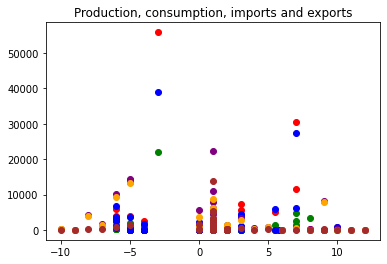

In [46]:
# plot the production scatter plot
plt.title("Production, consumption, imports and exports")

plt.scatter(x=prod_exp_df['time_zones'], y=prod_exp_df['2019 Prod'], color='red')
plt.scatter(x=prod_exp_df['time_zones'], y=prod_exp_df['2019 Cons'], color='green')
plt.scatter(x=prod_exp_df['time_zones'], y=prod_exp_df['2019 Exp'], color='blue')
plt.scatter(x=imp_exp_df['time_zones'], y=imp_exp_df['2019 Imp'], color='purple')
plt.scatter(x=imp_exp_df['time_zones'], y=imp_exp_df['2019 Cons'], color='orange')
plt.scatter(x=imp_exp_df['time_zones'], y=imp_exp_df['2019 Exp'], color='brown')

plt.show()

In [39]:
# ignore this till later
'''
fig, ax, = plt.subplots()

importers_df['time_zones'].value_counts().plot(ax=ax, kind='bar', xlabel='time zones', ylabel='frequency')

plt.show()

tzDict = {}
for tzCell in importers_df['time_zones']:
    for tz in tzCell:
        if tz not in tzDict:
            tzDict[tz] = 0
        tzDict[tz] += 1

print(tzDict)
'''


"\nfig, ax, = plt.subplots()\n\nimporters_df['time_zones'].value_counts().plot(ax=ax, kind='bar', xlabel='time zones', ylabel='frequency')\n\nplt.show()\n\ntzDict = {}\nfor tzCell in importers_df['time_zones']:\n    for tz in tzCell:\n        if tz not in tzDict:\n            tzDict[tz] = 0\n        tzDict[tz] += 1\n\nprint(tzDict)\n"